In [1]:
from scipy.optimize import minimize
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from utility_functions import plot_lambdas_grid, get_decision_boundary, plot_decision_boundary, plot_data
%matplotlib inline

# Logistic Regression with Using Scipy Minimize

In [2]:
#Load the data
ex2data1 = np.loadtxt("data/ex2data1.txt", delimiter=",")

exam_1_score = ex2data1[:, 0]
exam_2_score = ex2data1[:, 1]

X = ex2data1[:, :2]
y = ex2data1[:, -1].reshape(-1, 1)

In [3]:
#Add constant to x
constants = np.ones((len(X), 1))
X = np.concatenate((constants, X), axis=1)

m = y.size
n = X.shape[1]
thetas = np.zeros(n)


def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def calculate_cost(thetas, X, y):
    epsilon = 1e-5
    h = sigmoid(X @ thetas.reshape(-1, 1))
    
    J = np.mean(
        (y) * -1 * np.log(h + epsilon)
        + (1-y) * -1 * np.log(1 - h + epsilon)
    )
    
    if np.isnan(J):
        return np.inf
    return J


def gradient(thetas, X, y):
    h = sigmoid(X @ (thetas.reshape(-1, 1)))
    grad = (1 / m) * X.T @ (h - y)
    
    return grad.flatten()

In [4]:
res_lin = minimize(
            fun=calculate_cost,
            x0=thetas,
            args=(X,y),
            method=None,
            jac=gradient,
            options={'maxiter':400}
          )

res_lin

      fun: 0.20348330288662328
 hess_inv: array([[ 3.35842228e+03, -2.68714031e+01, -2.72032997e+01],
       [-2.68714031e+01,  2.29011185e-01,  2.04933126e-01],
       [-2.72032997e+01,  2.04933126e-01,  2.35567014e-01]])
      jac: array([-8.09260088e-08, -6.18168432e-06, -3.84655588e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 23
     njev: 30
   status: 0
  success: True
        x: array([-25.16133476,   0.20623168,   0.20147163])

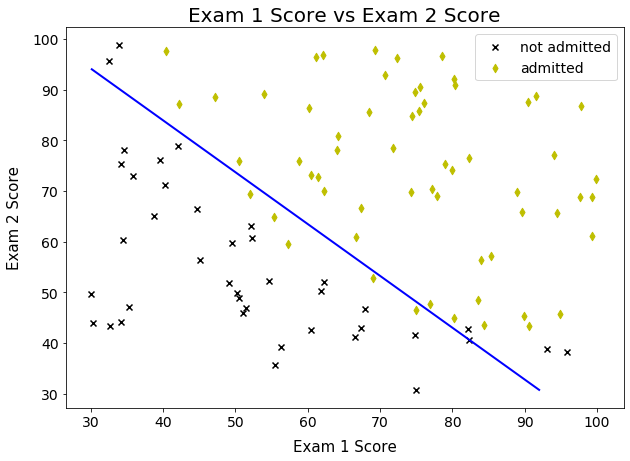

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

# Divide the dataset as negatives and positives.
negatives = ex2data1[ex2data1[:, -1] == 0]
positives = ex2data1[ex2data1[:, -1] == 1]

# Make the plot pretty.
ax.set_xlabel("Exam 1 Score", fontsize=15, labelpad=10)
ax.set_ylabel("Exam 2 Score", fontsize=15, labelpad=10)
ax.set_title("Exam 1 Score vs Exam 2 Score", fontsize=20)
ax.tick_params(labelsize=14)

# Plot both negative and positive classes to the same figure.
plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "not admitted"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "admitted"})
ax.legend(prop={'size': 14});

# Get the decision boundary and plot it within the same figure.
# Please note that X[:, 1:] as we have already fit an intercept
xx1, xx2, h = get_decision_boundary(X[:, 1:], res_lin.x)
ax.contour(xx1, xx2, h, [0.5], linewidths=2, colors="blue");

# Regularised Logistic Regression with Using Scipy Minimize

In [6]:
ex2data2 = np.loadtxt("data/ex2data2.txt", delimiter=",")

exam_1_score = ex2data2[:, 0]
exam_2_score = ex2data2[:, 1]

X = ex2data2[:, :-1]
y = ex2data2[:, -1].reshape(-1, 1)

In [7]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def reg_calculate_cost(thetas, LAMBDA, *args):
    m = y.size
    h = sigmoid(X_poly @ thetas)
    
    J = -1 * (1/m)*(np.log(h).T @ y + np.log(1 - h).T @ (1 - y)) + (LAMBDA/(2*m))*np.sum(np.square(thetas[1:]))
    return(J[0])


def reg_gradient(thetas, LAMBDA, *args):
    h = sigmoid(X_poly @ thetas.reshape(-1, 1))
    
    regularisation = (LAMBDA / m) * thetas[1:]
    regularisation_theta_0_added = np.insert(regularisation, 0, 0, axis=0).reshape(-1, 1)
    
    grad = (1 / m) * X_poly.T @ (h - y) + regularisation_theta_0_added
    return grad.flatten()

In [8]:
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)

n = X_poly.shape[1]

thetas = np.zeros(n)
LAMBDA = 0

res = minimize(
        fun=reg_calculate_cost,
        x0=thetas,
        args=(LAMBDA, X_poly, y),
        method=None,
        jac=reg_gradient,
        options={'maxiter':3000}        
)
res

      fun: 0.32190454386502865
 hess_inv: array([[   298.24547101,    360.84265944,    411.5043181 ,
         -1341.64361719,   -605.22933991,  -1249.92311022,
          -803.37391841,  -1368.97619105,  -1375.94838032,
          -949.26724581,   1576.79070561,   1678.87559024,
          3660.22268751,   2005.0747143 ,   1557.53455056],
       [   360.84265944,   1422.93392986,    870.43580818,
         -2069.03759809,   -749.73991546,  -1516.99291837,
         -3329.48931386,  -4720.30824746,  -5537.6606146 ,
         -2457.86001561,   3622.5687945 ,   4799.48221865,
          8688.56675223,   5421.74507509,   2766.93656602],
       [   411.5043181 ,    870.43580818,   1521.59512944,
         -1917.28895349,   -990.33763281,  -1966.84415786,
         -1920.27127932,  -5248.4053882 ,  -5851.24815556,
         -4389.69326386,   2635.8422499 ,   4834.14407152,
          9317.27261142,   6889.5904434 ,   4537.29115555],
       [ -1341.64361719,  -2069.03759809,  -1917.28895349,
          8

/home/cagri/Desktop/Google Drive/Python_Projects/Andrew NG Coursera/ex2/utility_functions.py:7: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))


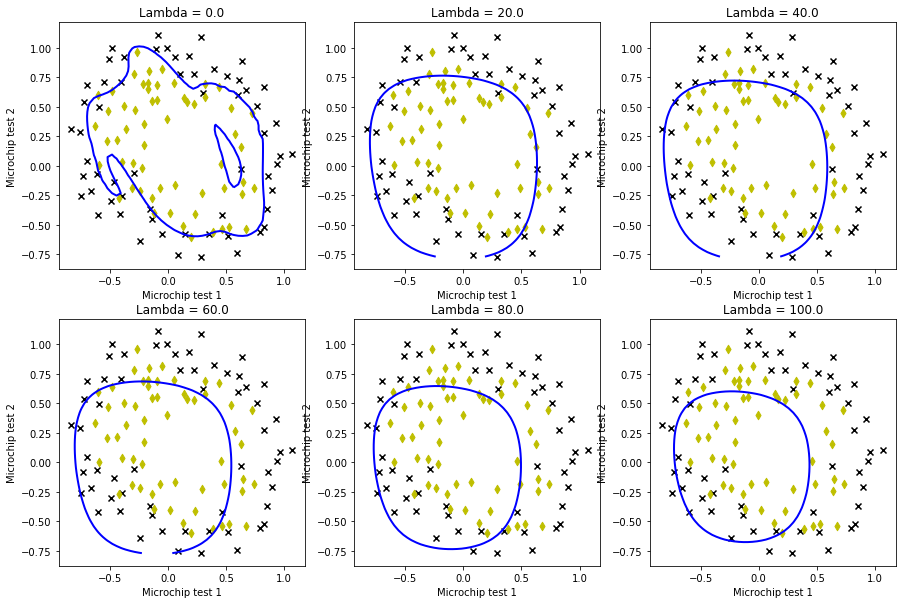

In [9]:
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

plot_lambdas_grid(
    data=ex2data2,
    X=X,
    y=y,
    X_poly=X_poly,
    PolynomialFeatures_instance=poly,
    grid_rows=2,
    grid_columns=3,
    LAMBDA_start=0,
    LAMBDA_end=100,
    cost_func=reg_calculate_cost,
    gradient=reg_gradient
)